# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as plx

import warnings
warnings.filterwarnings('ignore')

# 2. Read Data

> takehome_users.csv

In [2]:
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df1.shape

(12000, 10)

In [4]:
df1.info() # last_session_creation_time & invited_by_user_id have empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


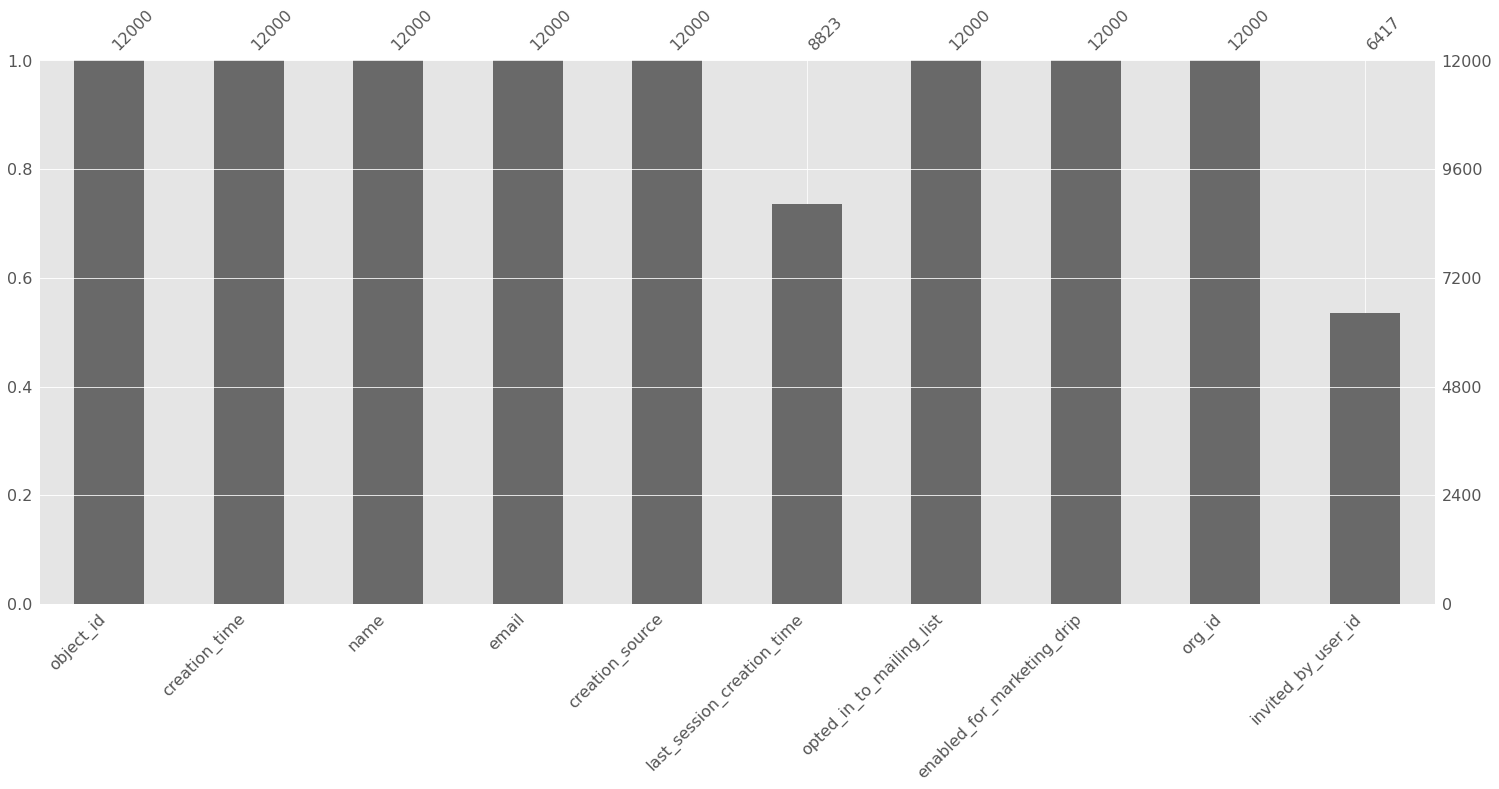

In [6]:
plt.figure(figsize=(10, 5))
# msn.matrix(df1)
msn.bar(df1) # Missing datas
plt.show()

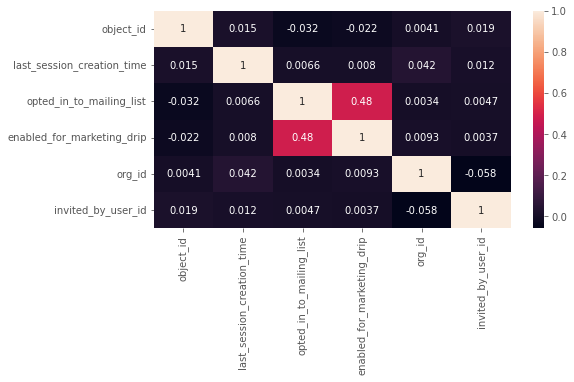

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(), annot=True)
plt.show()

> takehome_user_engagement.csv

In [8]:
df2 = pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
df2.shape

(207917, 3)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
df2.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [12]:
df2.corr()

,user_id,visited
user_id,1.0,NaN
visited,NaN,NaN


In [13]:
df2.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

## Observation
-----------------
1. In df1, their are correlation between features which are over 5%.
2. opted_in_to_mailing_list and enabled_for_marketing_drip have correlation of 48%
3. org_id & invited_by_user_id have 2.8% correlation.
4. df2 have no correlation features.

# Pre-Processing

## df1 Column-wise

In [14]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

object_id

In [15]:
print(df1.object_id.nunique(), df1.object_id.dtype)

12000 int64


In [16]:
df1.object_id.isnull().sum()

0

creation_time

In [17]:
print(df1.creation_time.nunique(), df1.creation_time.dtype)

11996 object


In [18]:
df1.creation_time = pd.to_datetime(df1.creation_time)
print(df1.creation_time.dtype)

datetime64[ns]


In [19]:
df1.creation_time.isnull().sum()

0

name

In [20]:
df1.name.nunique()

11349

In [21]:
df1.name.duplicated().sum()

651

In [22]:
df1.name.isnull().sum()

0

email

In [23]:
df1.email.nunique()

11980

In [24]:
df1.email.duplicated().sum()

20

In [25]:
df1.email.isnull().sum()

0

In [26]:
df1.email = df1.email.str.lower()

creation_source

In [27]:
df1.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [28]:
df1.creation_source.isnull().sum()

0

last_session_creation_time

In [29]:
df1.last_session_creation_time.value_counts()

1.401868e+09    2
1.401917e+09    2
1.398139e+09    1
1.381812e+09    1
1.400737e+09    1
               ..
1.393803e+09    1
1.343116e+09    1
1.382131e+09    1
1.373158e+09    1
1.390727e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64

In [30]:
df1.last_session_creation_time = pd.to_datetime(df1.last_session_creation_time, unit='s')
df1.last_session_creation_time.head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]

In [31]:
df1.last_session_creation_time.fillna(df1.creation_time, inplace=True)

In [32]:
df1.last_session_creation_time.isnull().sum()

0

opted_in_to_mailing_list

In [33]:
df1.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [34]:
df1.opted_in_to_mailing_list.isnull().sum()

0

enabled_for_marketing_drip

In [35]:
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [36]:
df1.enabled_for_marketing_drip.isnull().sum()

0

org_id

In [37]:
df1.org_id.isnull().sum()

0

In [38]:
df1.org_id.nunique()

417

invited_by_user_id

In [39]:
df1.invited_by_user_id.isnull().sum()

5583

In [40]:
# df1.invited_by_user_id = df1.invited_by_user_id.replace(np.nan, 0)

In [41]:
# df1.invited_by_user_id = df1.invited_by_user_id.astype('int')

In [42]:
df1.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [43]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## df2 Column-wise

In [44]:
print(df2.columns, df2.shape)

Index(['time_stamp', 'user_id', 'visited'], dtype='object') (207917, 3)


time_stamp

In [45]:
print(df2.time_stamp.nunique(), df2.time_stamp.dtype)

207220 object


In [46]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)
print(df2.time_stamp.dtype)

datetime64[ns]


In [47]:
df2.time_stamp.isnull().sum()

0

user_id

In [48]:
print(df2.user_id.nunique(), df2.user_id.dtype)

8823 int64


In [49]:
df2.user_id.isnull().sum()

0

visited

In [50]:
print(df2.visited.value_counts(), df2.visited.dtype)

1    207917
Name: visited, dtype: int64 int64


In [51]:
df2.visited.isnull().sum()

0

In [52]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Merge DataFrame df1 & df2

In [53]:
# We will merge data on object_id, so lets rename user_id in df2 to object_id
# df2.rename(columns={'user_id':'object_id'}, inplace=True)
# df2.head()

In [54]:
# df = pd.merge(df1, df2, how='outer', on='object_id')
# df.head()

In [55]:
# df[df.object_id == 2].head(10) #Checking object_id = 2 details

In [56]:
# df.shape

In [57]:
# df.isnull().sum()

In [58]:
# df = df.replace(np.nan, 0)
# df.shape

In [59]:
# df.drop_duplicates(inplace=True)
# df.shape

In [60]:
# df.describe()

### Save Cleaned df

In [61]:
# df.to_csv('takehome_cleaned_df.csv')

In [62]:
# df.head()

## Observation
-----------------
1. object_id, creation_time, name, email, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, time_stamp, user_id, visited doesn't have any null values.
2. email column text have been converted to lower case.
3. last_session_creation_time column null values replaced with creation_time.
4. creation_time, last_session_creation_time columns datatype changed to datetime type.
5. invited_by_user_id null values replaced with zero.
6. user_id is replaced with object_id. And df dataframe is created by merging df1 & df2 using object_id as common column.

# 3. Feature Engineering

## Account Creation Year & Month

In [63]:
df1['creation_year'] = df1.creation_time.dt.year
df1['creation_month'] = df1.creation_time.dt.month

In [64]:
new_order = ['object_id', 'creation_time', 'creation_year', 'creation_month', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
df1 = df1.reindex(columns=new_order)
df1.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,2014,4,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,2013,11,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,2013,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,2013,5,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,2013,1,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## User Login Year-Month-Week-Time data

In [65]:
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month
df2['year_week'] = df2.time_stamp.dt.strftime('%Y-%W')
df2['time'] = df2.time_stamp.dt.strftime('%H.%M')

In [66]:
new_order = ['time_stamp', 'year', 'month', 'time', 'year_week', 'user_id', 'visited']
df2 = df2.reindex(columns=new_order)
df2.head()

,time_stamp,year,month,time,year_week,user_id,visited
0,2014-04-22 03:53:30,2014,4,03.53,2014-16,1,1
1,2013-11-15 03:45:04,2013,11,03.45,2013-45,2,1
2,2013-11-29 03:45:04,2013,11,03.45,2013-47,2,1
3,2013-12-09 03:45:04,2013,12,03.45,2013-49,2,1
4,2013-12-25 03:45:04,2013,12,03.45,2013-51,2,1


## Adopted User

In [67]:
# Time period function
def time_period(df):
    if df.time >= 0 and df.time < 3:
        return 'Mid Night'
    elif df.time >=3 and df.time < 6:
        return 'Early Morning'
    elif df.time >= 6 and df.time < 9:
        return 'Morning'
    elif df.time >= 9 and df.time < 12:
        return 'Late Morning'
    elif df.time >=12 and df.time < 15:
        return 'Mid Noon'
    elif df.time >= 15 and df.time < 18:
        return 'After Noon'
    elif df.time >= 18 and df.time < 21:
        return 'Evening'
    else:
        return 'Night'

In [181]:
adopted_user_df = df2.groupby(['year', 'year_week', 'user_id', 'time'])['time_stamp'].count().reset_index(name='freq')
adopted_user_df = adopted_user_df[adopted_user_df.freq >= 3]
adopted_user_df.time = adopted_user_df.time.astype('float')
adopted_user_df['time_period'] = adopted_user_df.apply(time_period, axis=1)
adopted_user_df

,year,year_week,user_id,time,freq,time_period
39,2012,2012-23,1693,21.58,3,Night
96,2012,2012-24,728,16.04,4,After Noon
177,2012,2012-24,11764,17.40,3,After Noon
195,2012,2012-25,1693,21.58,3,Night
223,2012,2012-25,5297,17.32,3,After Noon
...,...,...,...,...,...,...
69480,2014,2014-22,11573,8.50,3,Morning
69484,2014,2014-22,11688,5.23,3,Early Morning
69488,2014,2014-22,11806,9.48,3,Late Morning
69493,2014,2014-22,11895,4.14,3,Early Morning


In [69]:
adopted_user_df.to_csv('adopted_user_df.csv')
adopted_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 39 to 69495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_week    33711 non-null  object 
 1   user_id      33711 non-null  int64  
 2   time         33711 non-null  float64
 3   freq         33711 non-null  int64  
 4   time_period  33711 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


## Final DataFrame for ML

In [70]:
# Adopted User ID's
id = adopted_user_df.user_id.value_counts().index
id.sort_values()

Int64Index([    2,    10,    20,    33,    42,    43,    53,    63,    69,
               74,
            ...
            11957, 11958, 11959, 11961, 11964, 11965, 11967, 11969, 11975,
            11988],
           dtype='int64', length=1444)

In [71]:
len(id)

1444

In [72]:
df3 = df1.copy()
df3['user_type'] = 0
df3.user_type[df3.object_id.isin(id)] = 1
df3.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type
0,1,2014-04-22 03:53:30,2014,4,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,2013,11,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,2013,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,2013,5,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,2013,1,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


# 4. Exploratory Data Analysis

## 4.1 Account creation analysis

### 4.1.1 Account opened w.r.t Year & Month

In [73]:
df1.creation_year.unique()
# Three years of data are present

array([2014, 2013, 2012], dtype=int64)

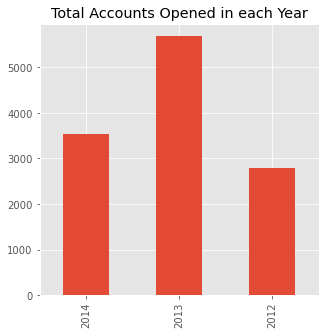

In [74]:
df1.creation_year.value_counts(sort=False).plot(kind='bar', figsize=(5,5))
plt.title('Total Accounts Opened in each Year')
plt.show()

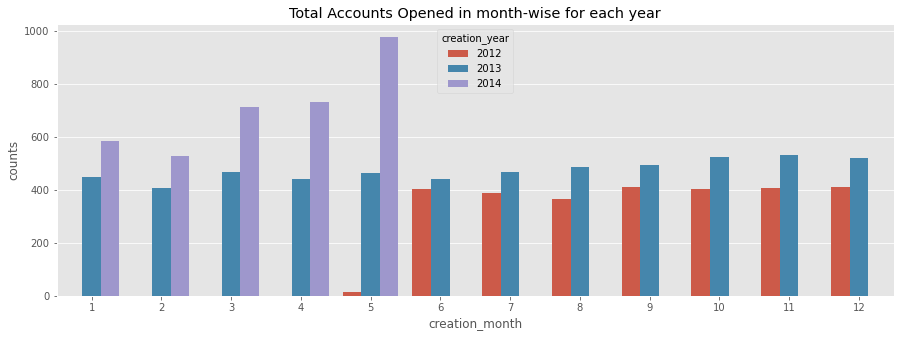

In [75]:
plt.figure(figsize=(15, 5))
cc = df1.groupby(['creation_year'])['creation_month'].value_counts().reset_index(name='counts')
sns.barplot(x=cc.creation_month, y=cc.counts, hue=cc.creation_year)
plt.title('Total Accounts Opened in month-wise for each year')
plt.show()

### 4.1.2 Acounts Opened Monthly in each Year

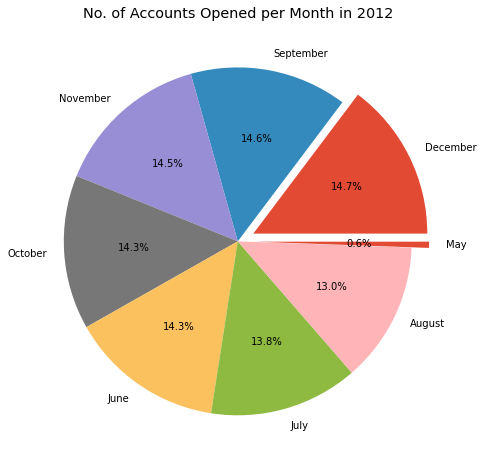

In [76]:
# YEAR 2012
df_2012 = df1[df1.creation_year==2012].creation_month.value_counts().reset_index(name='accounts_opened')
df_2012.rename(columns={'index':'creation_month_2012', 'creation_month':'accounts_opened'}, inplace=True)

plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0, 0, 0, 0.1]
label = ['December', 'September', 'November', 'October', 'June', 'July', 'August', 'May']
plt.pie(df_2012.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2012')
plt.show()

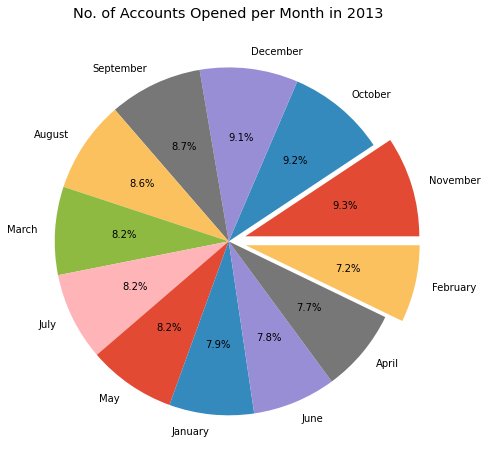

In [77]:
# YEAR 2013
df_2013 = df1[df1.creation_year==2013].creation_month.value_counts().reset_index(name='accounts_opened')
df_2013.rename(columns={'index':'creation_month_2013', 'creation_month':'accounts_opened'}, inplace=True)
# print(df_2013)
plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
label = ['November', 'October', 'December',  'September', 'August', 'March', 'July', 'May', 'January', 'June', 'April', 'February']
plt.pie(df_2013.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2013')
plt.show()

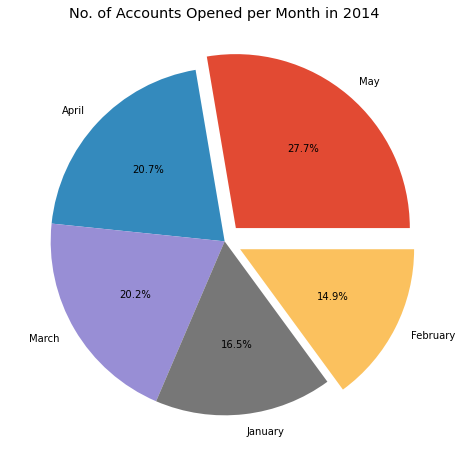

In [78]:
# YEAR 2014
df_2014 = df1[df1.creation_year==2014].creation_month.value_counts().reset_index(name='accounts_opened')
df_2014.rename(columns={'index':'creation_month_2014', 'creation_month':'accounts_opened'}, inplace=True)
# print(df_2014)
plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0.1]
label = ['May', 'April', 'March', 'January', 'February']
plt.pie(df_2014.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2014')
plt.show()

### 4.1.3 Average No. of Accounts Opened Montly & Yearly

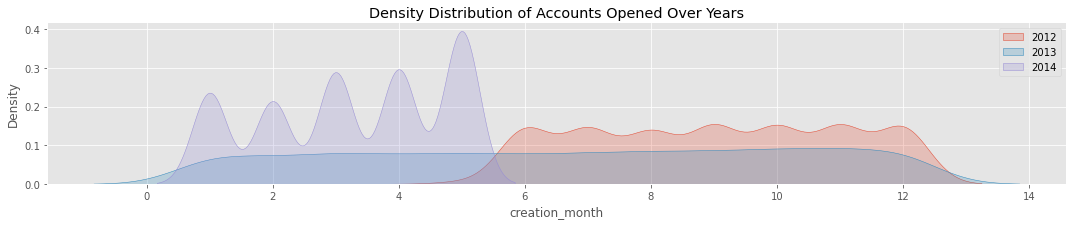

In [79]:
# Year wise account opening density distribution plot
sns.FacetGrid(df1, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts Opened Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [80]:
# Year 2012
avg_acc_12 = df_2012.accounts_opened.sum()/df_2012.index.nunique()
avg_acc_12 = avg_acc_12/df_2012.accounts_opened.sum() *100
avg_acc_y12 = df_2012.accounts_opened.sum()/df1.shape[0] * 100
# Year 2013
avg_acc_13 = df_2013.accounts_opened.sum()/df_2013.index.nunique()
avg_acc_13 = avg_acc_13/df_2013.accounts_opened.sum() *100
avg_acc_y13 = df_2013.accounts_opened.sum()/df1.shape[0] * 100
# Year 2014
avg_acc_14 = df_2014.accounts_opened.sum()/df_2014.index.nunique()
avg_acc_14 = avg_acc_14/df_2014.accounts_opened.sum() *100
avg_acc_y14 = df_2014.accounts_opened.sum()/df1.shape[0] * 100

avg_acc_mon = [avg_acc_12, avg_acc_13, avg_acc_14]
avg_acc_year = [avg_acc_y12, avg_acc_y13, avg_acc_y14]

total_average = pd.DataFrame({'year' : [2012, 2013, 2014],
                             'avg_acc_monthly(%)': avg_acc_mon,
                             'avg_acc_yearly(%)': avg_acc_year})
total_average.round(2)


,year,avg_acc_monthly(%),avg_acc_yearly(%)
0,2012,12.50,23.31
1,2013,8.33,47.30
2,2014,20.00,29.39


In [81]:
fig = plx.bar(total_average, x='year', y=['avg_acc_monthly(%)', 'avg_acc_yearly(%)'], text_auto=True, 
              title='Average % of Accounts Opened Monthly & Yearly', template='ggplot2')
fig.update_layout(height=600, width=900, title=dict(x=0.08, y=0.95, font=dict(size=30, family='Times New Roman')))
fig.show()

### 4.1.4 Overall Monthly Increase in Account Opening

In [82]:
monthly_perform = df1.groupby(['creation_year', 'creation_month'])['creation_month'].count().reset_index(name='total_count')
# Monthly growth rate with respect to previous month in (%)
monthly_perform['total_count_change_per'] = (monthly_perform.total_count.pct_change()*100).round(2)
monthly_perform.head()

,creation_year,creation_month,total_count,total_count_change_per
0,2012,5,16,NaN
1,2012,6,401,2406.25
2,2012,7,387,-3.49
3,2012,8,365,-5.68
4,2012,9,409,12.05


In [83]:
monthly_perform.describe() # avg growth rate per month is 104.57%

,creation_year,creation_month,total_count,total_count_change_per
count,25.000000,25.000000,25.000000,24.000000
mean,2012.880000,6.440000,480.000000,104.569583
std,0.725718,3.465064,165.349378,490.384095
min,2012.000000,1.000000,16.000000,-9.450000
25%,2012.000000,4.000000,407.000000,-2.567500
50%,2013.000000,6.000000,463.000000,2.005000
75%,2013.000000,9.000000,523.000000,9.387500
max,2014.000000,12.000000,976.000000,2406.250000


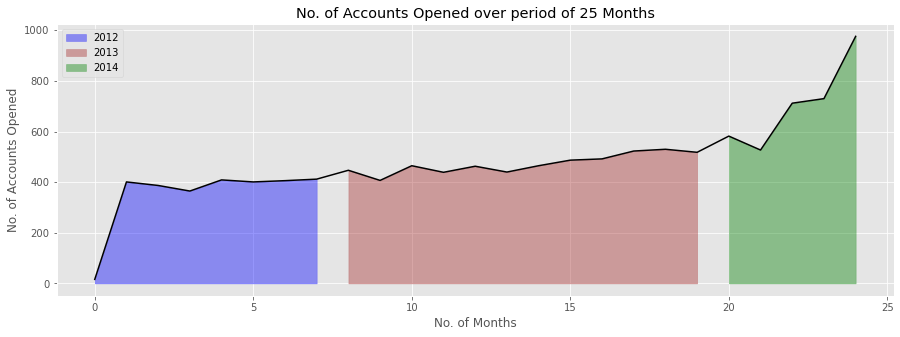

In [84]:
plt.figure(figsize=(15, 5))
plt.fill_between(monthly_perform[monthly_perform.creation_year==2012].index, 
                 monthly_perform[monthly_perform.creation_year==2012].total_count, color='blue', alpha=0.4)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2013].index, 
                 monthly_perform[monthly_perform.creation_year==2013].total_count, color='brown', alpha=0.4)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2014].index, 
                 monthly_perform[monthly_perform.creation_year==2014].total_count, color='green', alpha=0.4)
plt.plot(monthly_perform.index, monthly_perform.total_count, color='black', alpha=1)
plt.legend(labels=[2012, 2013, 2014])
plt.xlabel('No. of Months')
plt.ylabel('No. of Accounts Opened')
plt.title('No. of Accounts Opened over period of 25 Months')
plt.show()

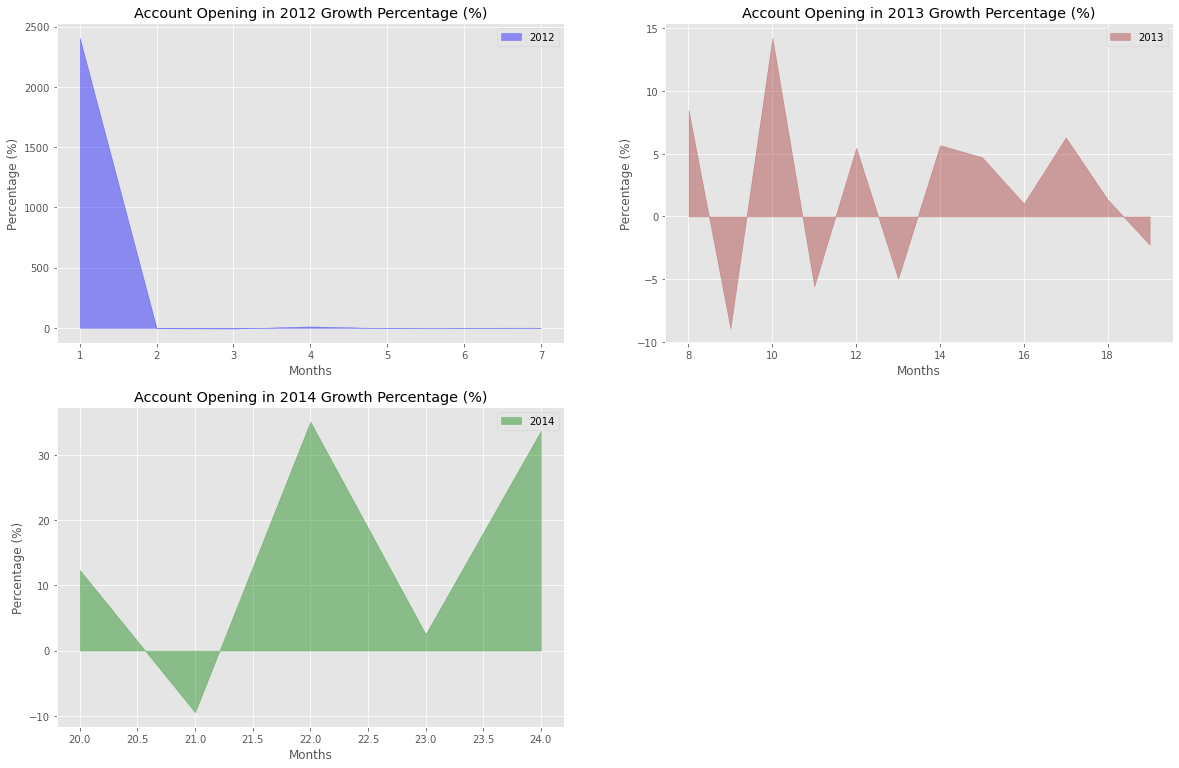

In [85]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2012].index, 
                 monthly_perform[monthly_perform.creation_year==2012].total_count_change_per, color='blue', alpha=0.4)
plt.legend(labels=[2012])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2012 Growth Percentage (%)')

plt.subplot(322)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2013].index, 
                 monthly_perform[monthly_perform.creation_year==2013].total_count_change_per, color='brown', alpha=0.4)
plt.legend(labels=[2013])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2013 Growth Percentage (%)')

plt.subplot(323)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2014].index, 
                 monthly_perform[monthly_perform.creation_year==2014].total_count_change_per, color='green', alpha=0.4)
plt.legend(labels=[2014])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2014 Growth Percentage (%)')
plt.show()

### Observations
-----------------
1. In 25 Months period (2012-2014), the average growth rate of account opening is 104.57%.
2. Most of the accounts were opened in year 2013, as it was full year compared to 2012 & 2014.
3. Max. accounts were opend in Dec. 2012, Nov.2013, May 2014.
4. Highest avg. percentage of account opened monthly was 20% in 2014. While highest avg. account opened yearly was 47.3% in 2013.

## 4.2 Multiple Account Users

In [86]:
# No. of duplicate names
df1.name.duplicated().sum()

651

In [87]:
# Total no. of unique names
df1.name.nunique()

11349

In [88]:
# Duplicate account creation source are
df1[df1.name.duplicated()].creation_source.value_counts()

ORG_INVITE            220
GUEST_INVITE          127
PERSONAL_PROJECTS     116
SIGNUP                107
SIGNUP_GOOGLE_AUTH     81
Name: creation_source, dtype: int64

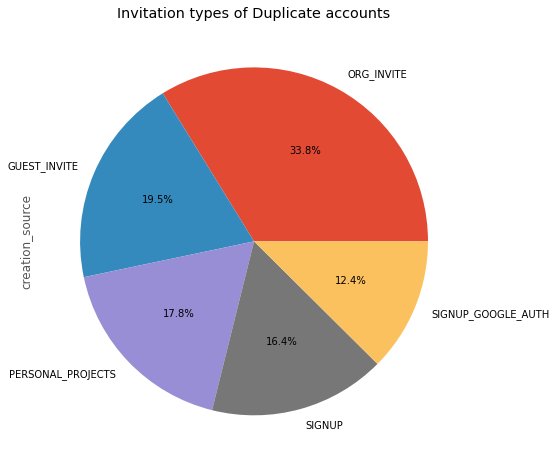

In [89]:
plt.figure(figsize=(8, 8))
df1[df1.name.duplicated()].creation_source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Invitation types of Duplicate accounts')
plt.show()

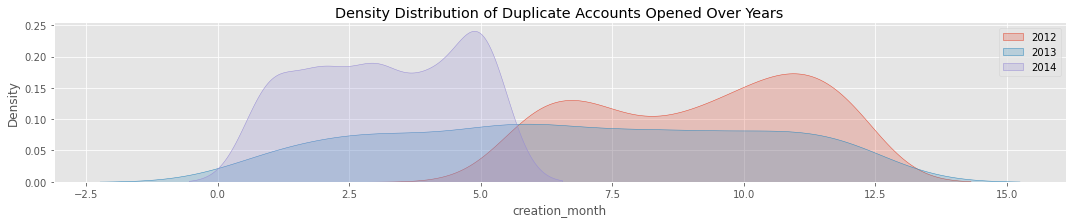

In [90]:
df_dup = df1[df1.name.duplicated()]
# Year wise account opening density distribution plot
sns.FacetGrid(df_dup, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Duplicate Accounts Opened Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [91]:
# No. of Duplicate emails are
df1.email.duplicated().sum()

20

### Observation
---------------
1. There are 20 duplicate emails and 651 duplicate accounts.
2. Most of the duplicate accounts are from organization invitations.
3. Most of the duplicate accounts were opened during 2012 & 2014

## 4.3 Invitation Analysis

In [92]:
df1.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [93]:
# Percentage of accounts opened through Invitations ('GUEST_INVITE', 'ORG_INVITE')
((df1.shape[0]-df1.invited_by_user_id.isna().sum()) / df1.shape[0] * 100).round(2)

53.47

In [94]:
# Percentage of accounts opened through Invitations ('SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH')
((df1.invited_by_user_id.isna().sum()) / df1.shape[0] * 100).round(2)

46.52

### 4.3.1 Types of Invitations

In [95]:
df_cs = df1.creation_source.value_counts().reset_index(name='total')
df_cs['percentage'] = (df_cs.total/df_cs.total.sum()*100).round(2)
df_cs

,index,total,percentage
0,ORG_INVITE,4254,35.45
1,GUEST_INVITE,2163,18.02
2,PERSONAL_PROJECTS,2111,17.59
3,SIGNUP,2087,17.39
4,SIGNUP_GOOGLE_AUTH,1385,11.54


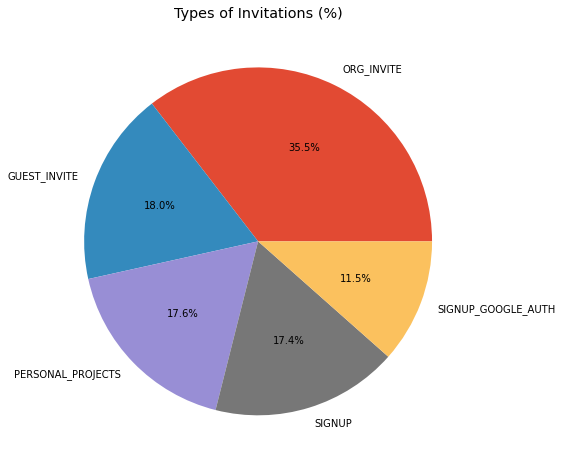

In [96]:
# Percentage of each invitation (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(df_cs.percentage, labels=df_cs['index'], autopct='%1.1f%%')
plt.title('Types of Invitations (%)')
plt.show()

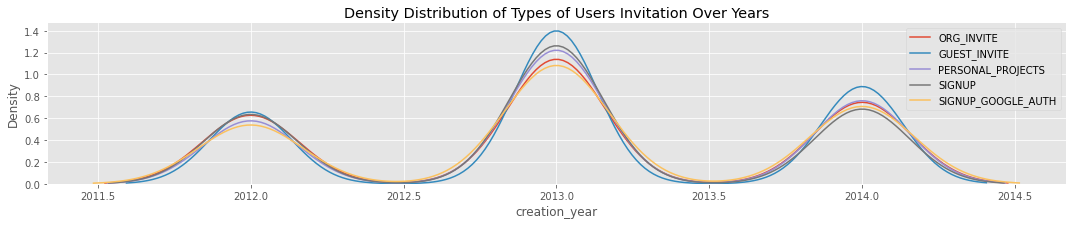

In [97]:
# Year wise Adopted user density distribution plot
sns.FacetGrid(df1, hue='creation_source', aspect=5).map(sns.kdeplot, 'creation_year', shade=False)
plt.title('Density Distribution of Types of Users Invitation Over Years')
plt.legend(labels=['ORG_INVITE', 'GUEST_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'])
plt.show()

### 4.3.2 Invitation by UserID

In [98]:
df1.invited_by_user_id.value_counts().head(10)

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
7012.0     10
4803.0     10
6370.0     10
4302.0     10
1175.0     10
Name: invited_by_user_id, dtype: int64

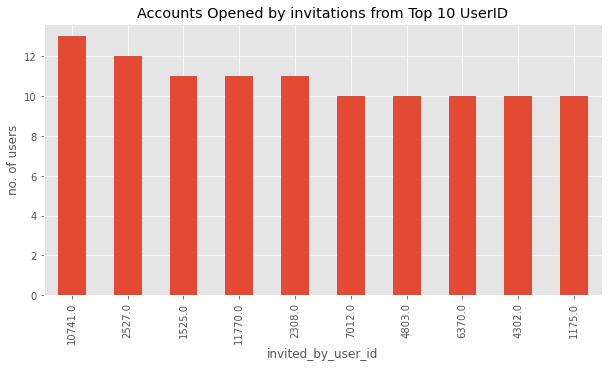

In [99]:
plt.figure(figsize=(10, 5))
df1.invited_by_user_id.value_counts().head(10).plot(kind='bar', xlabel='invited_by_user_id', ylabel='no. of users')
plt.title('Accounts Opened by invitations from Top 10 UserID')
plt.show()

In [100]:
# Top UserID invitation account creation source are
id = df1.invited_by_user_id.value_counts().head(10).index
df1[df1.invited_by_user_id.isin(id)].creation_source.value_counts()

ORG_INVITE      74
GUEST_INVITE    34
Name: creation_source, dtype: int64

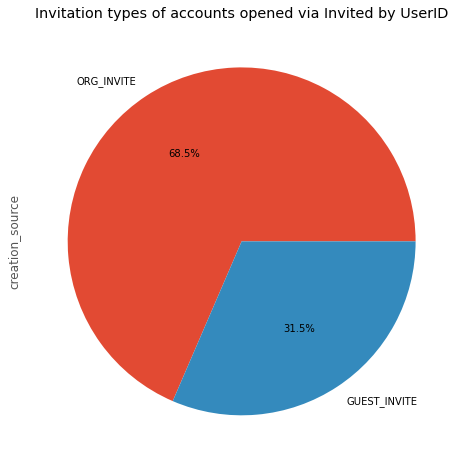

In [101]:
plt.figure(figsize=(8, 8))
df1[df1.invited_by_user_id.isin(id)].creation_source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Invitation types of accounts opened via Invited by UserID')
plt.show()

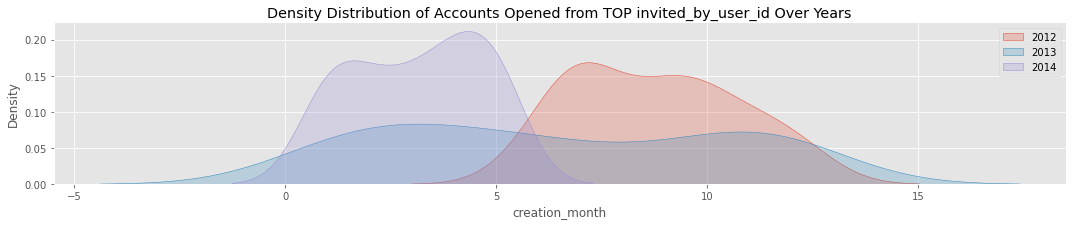

In [102]:
df_inv = df1[df1.invited_by_user_id.isin(id)]
# Year wise account opening density distribution plot
sns.FacetGrid(df_inv, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts Opened from TOP invited_by_user_id Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [103]:
df1.columns

Index(['object_id', 'creation_time', 'creation_year', 'creation_month', 'name',
       'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id'],
      dtype='object')

### Observation
-----------------
1. creation_source from 'SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH' are accounts opend without any invitation like 'GUEST_INVITE', 'ORG_INVITE'.
2. Most of the accounts opened were through ORG_INVITE & GUEST_INVITE.
3. Top 10 UserID that opened most accounts where mostly from Organization and Guests.
4. Accounts opened through top 10 UserID's were high during 2012 & 2014.

## 4.4 Mailing

### 4.4.1 Accounts opted for Mailing

In [104]:
df_op = df1.opted_in_to_mailing_list.value_counts().reset_index(name='total_count')
df_op['index'] = df_op['index'].replace([0, 1], ['Not Opted', "Opted"])
df_op

,index,total_count
0,Not Opted,9006
1,Opted,2994


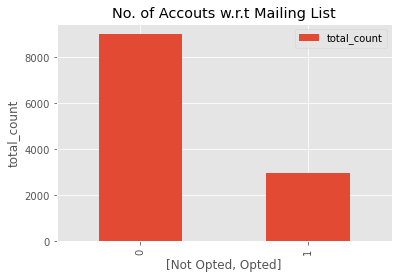

In [105]:
df_op.plot(kind='bar', xlabel=df_op['index'], ylabel='total_count', title='No. of Accouts w.r.t Mailing List')
plt.show()

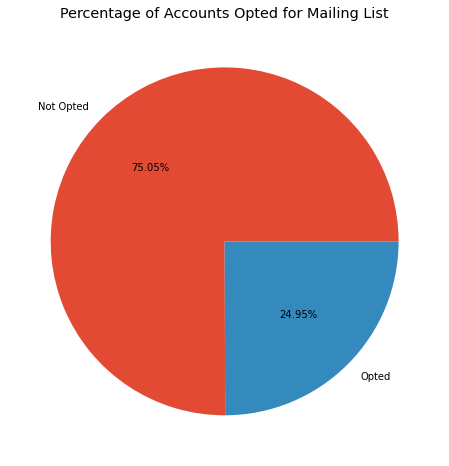

In [106]:
plt.figure(figsize=(8,8))
plt.pie(df_op.total_count, labels = df_op['index'], autopct='%1.2f%%')
plt.title('Percentage of Accounts Opted for Mailing List')
plt.show()

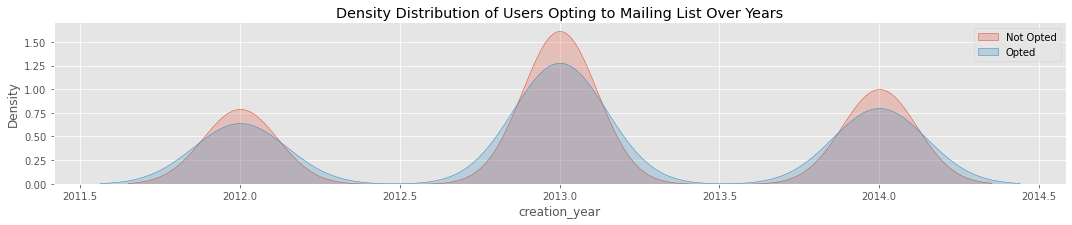

In [107]:
# Year wise Adopted user density distribution plot
sns.FacetGrid(df1, hue='opted_in_to_mailing_list', aspect=5).map(sns.kdeplot, 'creation_year', shade=True)
plt.title('Density Distribution of Users Opting to Mailing List Over Years')
plt.legend(labels=['Not Opted', 'Opted'])
plt.show()

### 4.4.2 Accounts opted for Marketing Drip

In [108]:
df_mk = df1.enabled_for_marketing_drip.value_counts().reset_index(name='total_count')
df_mk['index'] = df_mk['index'].replace([0, 1], ['Not Opted', "Opted"])
df_mk

,index,total_count
0,Not Opted,10208
1,Opted,1792


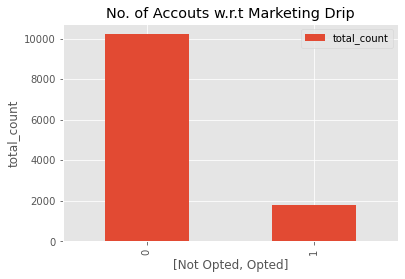

In [109]:
df_mk.plot(kind='bar', xlabel=df_mk['index'], ylabel='total_count', title='No. of Accouts w.r.t Marketing Drip')
plt.show()

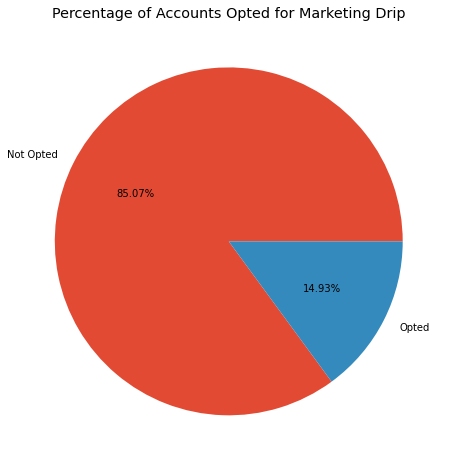

In [110]:
plt.figure(figsize=(8,8))
plt.pie(df_mk.total_count, labels = df_mk['index'], autopct='%1.2f%%')
plt.title('Percentage of Accounts Opted for Marketing Drip')
plt.show()

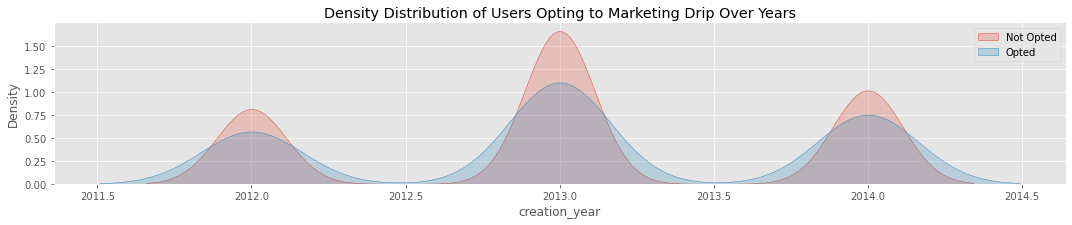

In [111]:
# Year wise Adopted user density distribution plot
sns.FacetGrid(df1, hue='enabled_for_marketing_drip', aspect=5).map(sns.kdeplot, 'creation_year', shade=True)
plt.title('Density Distribution of Users Opting to Marketing Drip Over Years')
plt.legend(labels=['Not Opted', 'Opted'])
plt.show()

### 4.4.3 Accounts Opted for Mailing list & Marketing Drip

In [112]:
df_op_mk = df1[(df1.opted_in_to_mailing_list == 1) & (df1.enabled_for_marketing_drip == 1)]
df_op_mk.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,2013,7,Hamilton Danielle,daniellehamilton@yahoo.com,PERSONAL_PROJECTS,2013-07-31 05:34:02,1,1,74,NaN
9,10,2013-01-16 22:08:03,2013,1,Santos Carla,carlaferreirasantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0
31,32,2013-04-17 16:21:30,2013,4,Perez Timothy,timothyjperez@yahoo.com,PERSONAL_PROJECTS,2013-04-17 16:21:30,1,1,98,NaN
46,47,2012-06-07 13:23:02,2012,6,Carrillo Hillary,hillaryjcarrillo@yahoo.com,ORG_INVITE,2012-06-08 13:23:02,1,1,32,11800.0
53,54,2013-03-17 12:31:27,2013,3,Nilsson Michelle,michellemnilsson@hotmail.com,GUEST_INVITE,2013-03-20 12:31:27,1,1,51,3876.0


In [113]:
# No. of Accounts Opned have actually Opted for Mailing list and Marketing Drip
df_op_mk.object_id.count()

1342

In [114]:
df_op_mk.creation_source.value_counts()

ORG_INVITE            490
SIGNUP                240
GUEST_INVITE          237
PERSONAL_PROJECTS     217
SIGNUP_GOOGLE_AUTH    158
Name: creation_source, dtype: int64

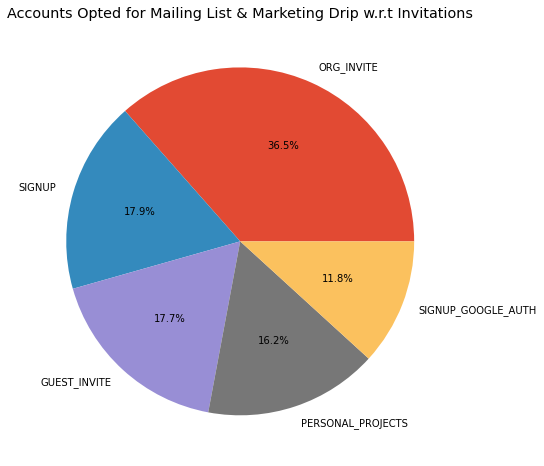

In [115]:
plt.figure(figsize=(8, 8))
plt.pie(df_op_mk.creation_source.value_counts(), labels=df_op_mk.creation_source.value_counts().index, autopct='%1.1f%%')
plt.title('Accounts Opted for Mailing List & Marketing Drip w.r.t Invitations')
plt.show()

### Observation
---------------
1. Out of 12K accounts, 2994 (24.95%) accounts have opted for Mailing List.
2. Only 1792 (14.93%) accounts have opted for Marketing Drip.
3. Totally 1342 out of 12K accounts have opted for Both Mailing list & Marketing Drip.
4. Most of accounts who opted for both mailing are from ORG_INVITE invitation.

## 4.5 Organization-ID

In [116]:
# Replacing org_id with 0 to NaN
df1.org_id = df1.org_id.replace(0, np.nan)

In [117]:
# Number of Accounts not belonging to Organizations are
df1.org_id.isnull().sum()

319

In [118]:
# Top 10 org_id where acounts belong to
df1.org_id.value_counts().head(10)

1.0     233
2.0     201
3.0     168
4.0     159
6.0     138
5.0     128
9.0     124
7.0     119
10.0    104
8.0      97
Name: org_id, dtype: int64

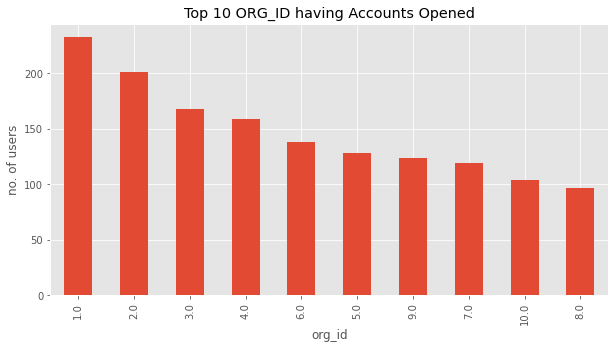

In [119]:
plt.figure(figsize=(10, 5))
df1.org_id.value_counts()[:8].plot(kind='bar', xlabel='org_id', ylabel='no. of users')
plt.title('Top 10 ORG_ID having Accounts Opened')
plt.show()

In [120]:
# Top Organization accounts creation source are
df1[df1.org_id<=10].creation_source.value_counts()

ORG_INVITE            533
GUEST_INVITE          269
PERSONAL_PROJECTS     267
SIGNUP                231
SIGNUP_GOOGLE_AUTH    171
Name: creation_source, dtype: int64

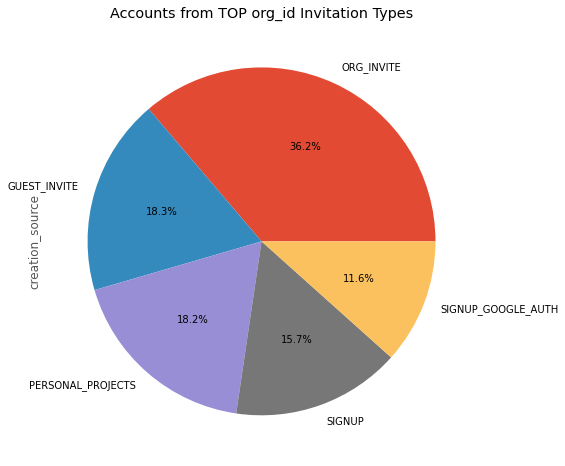

In [121]:
plt.figure(figsize=(8, 8))
df1[df1.org_id<=10].creation_source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accounts from TOP org_id Invitation Types')
plt.show()

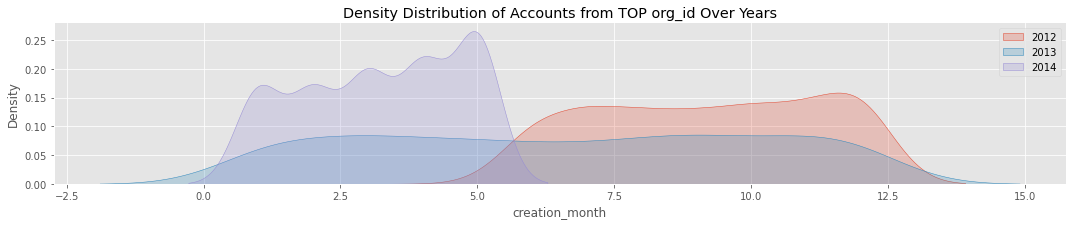

In [122]:
df_org = df1[df1.org_id<=10]
# Year wise account opening density distribution plot
sns.FacetGrid(df_org, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts from TOP org_id Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

### Observation
--------------
1. Accounts not belonging to organization are 319.
2. Most of the accounts were opened from org_id 1 - 10.
3. Most of the accounts from top 10 organizations were opened via organizational & guest invitaions.
4. Most of accounts belonging to organizations were opened during 2014.

## 4.6 Logged timestamp

### 4.6.1 Active Users (%)

In [123]:
df2.head()

,time_stamp,year,month,time,year_week,user_id,visited
0,2014-04-22 03:53:30,2014,4,03.53,2014-16,1,1
1,2013-11-15 03:45:04,2013,11,03.45,2013-45,2,1
2,2013-11-29 03:45:04,2013,11,03.45,2013-47,2,1
3,2013-12-09 03:45:04,2013,12,03.45,2013-49,2,1
4,2013-12-25 03:45:04,2013,12,03.45,2013-51,2,1


In [124]:
# No. of Active Users from Login data
df2.user_id.nunique()

8823

In [125]:
# Percentage of Active Users w.r.t 12,000 Users
round(df2.user_id.nunique()/df1.object_id.nunique()*100, 2)

73.52

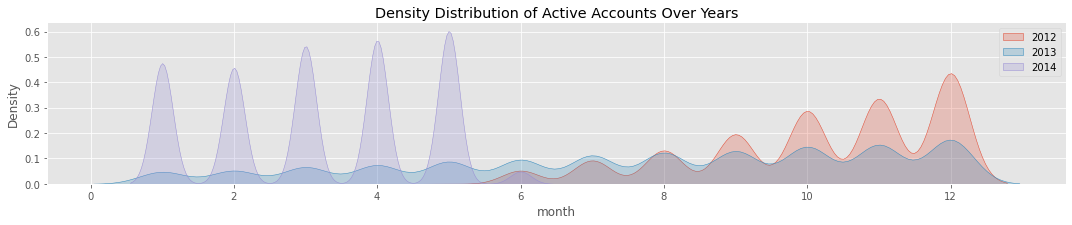

In [126]:
# Users activity over period
# Year wise account opening density distribution plot
sns.FacetGrid(df2, hue='year', aspect=5).map(sns.kdeplot, 'month', shade=True)
plt.title('Density Distribution of Active Accounts Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [127]:
# Active Users ID
id = df2.user_id.value_counts().index
len(id)

8823

In [128]:
# Top Organization accounts creation source are
df1[df1.object_id.isin(id)].creation_source.value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

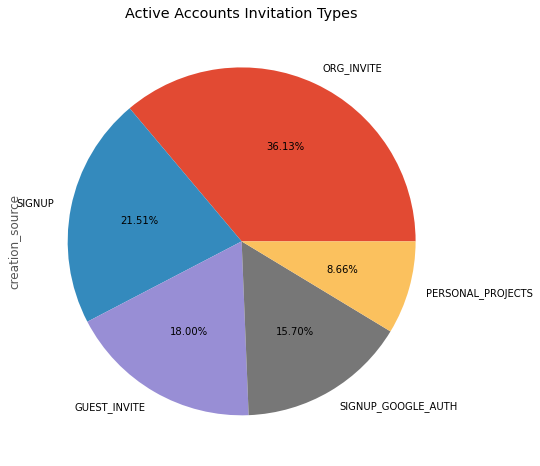

In [129]:
plt.figure(figsize=(8, 8))
df1[df1.object_id.isin(id)].creation_source.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Active Accounts Invitation Types')
plt.show()

### 4.6.2 Adopted Users with Time Periods

In [130]:
# Adopted users are users who visited the product atleast 3 times in a week
adopted_user_df.head()

,year_week,user_id,time,freq,time_period
39,2012-23,1693,21.58,3,Night
96,2012-24,728,16.04,4,After Noon
177,2012-24,11764,17.40,3,After Noon
195,2012-25,1693,21.58,3,Night
223,2012-25,5297,17.32,3,After Noon


In [131]:
adopted_user_df.user_id.nunique()

1444

In [132]:
# Percentage of Adopted Users w.r.t Active Users is
round(adopted_user_df.user_id.nunique() / df2.user_id.nunique() * 100, 2)

16.37

In [133]:
# Percentage of Adopted Users w.r.t Total Users is
round(adopted_user_df.user_id.nunique() / df1.object_id.nunique() * 100, 2)

12.03

In [134]:
# Frequencies of Adopted User
adopted_user_df.freq.value_counts()

3    9425
4    7362
7    6541
5    5825
6    4558
Name: freq, dtype: int64

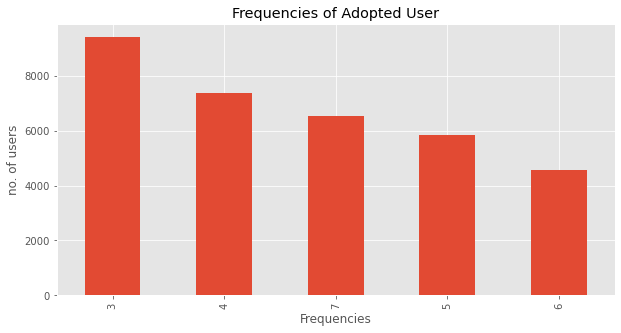

In [135]:
plt.figure(figsize=(10, 5))
adopted_user_df.freq.value_counts().plot(kind='bar', xlabel='Frequencies', ylabel='no. of users')
plt.title('Frequencies of Adopted User')
plt.show()

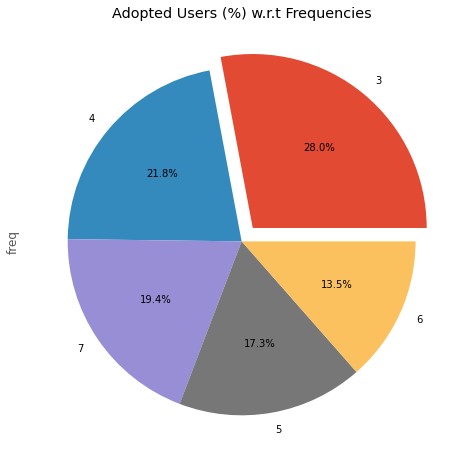

In [136]:
plt.figure(figsize=(8, 8))
e = (0.1, 0, 0, 0, 0)
adopted_user_df.freq.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=e)
plt.title('Adopted Users (%) w.r.t Frequencies')
plt.show()

In [137]:
# Adopted User ID
id = adopted_user_df.user_id.value_counts().index
id

Int64Index([ 9402,  7590,   906,  8068,  4022,  3623,  8029,  8280,    69,
             1811,
            ...
             6114, 10322,  9435, 10299,  5960,  8278,   141,  3080,  2636,
             8460],
           dtype='int64', length=1444)

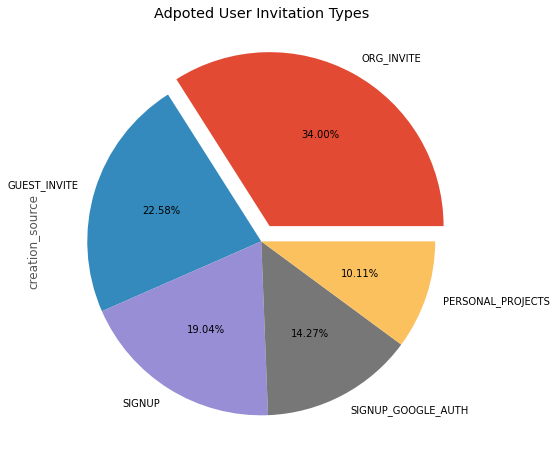

In [138]:
plt.figure(figsize=(8, 8))
e = (0.1, 0, 0, 0, 0)
df1[df1.object_id.isin(id)].creation_source.value_counts().plot(kind='pie', autopct='%1.2f%%', explode=e)
plt.title('Adpoted User Invitation Types')
plt.show()

In [139]:
# Adopted User Time Period
adopted_user_df.time_period.value_counts()

Evening          4590
After Noon       4548
Night            4488
Early Morning    4411
Late Morning     4136
Mid Noon         4026
Morning          3790
Mid Night        3722
Name: time_period, dtype: int64

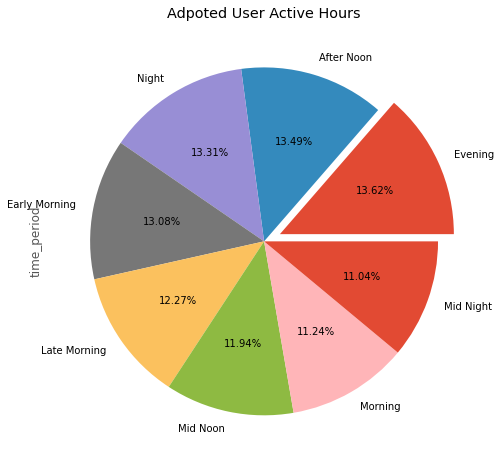

In [140]:
plt.figure(figsize=(8, 8))
e = (0.1, 0, 0, 0, 0, 0, 0, 0)
adopted_user_df.time_period.value_counts().plot(kind='pie', autopct='%1.2f%%', explode=e)
plt.title('Adpoted User Active Hours')
plt.show()

In [141]:
ad_us_1 = df1[df1.object_id.isin(id)].opted_in_to_mailing_list.value_counts()
ad_us_2 = df1[df1.object_id.isin(id)].enabled_for_marketing_drip.value_counts()
data = {'Ad_Mailing_List' : [ad_us_1[0], ad_us_1[1]],
        'Ad_Marketing_Drip' : [ad_us_2[0], ad_us_2[1]]}
adopted_user_mail_market = pd.DataFrame(data, index=['Not_Opted', 'Opted'])
adopted_user_mail_market

,Ad_Mailing_List,Ad_Marketing_Drip
Not_Opted,1066,1220
Opted,378,224


<Figure size 576x360 with 0 Axes>

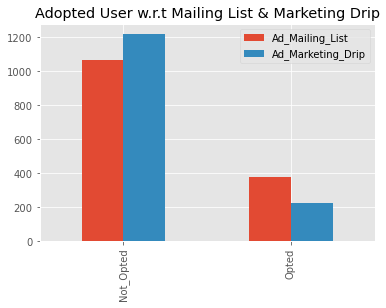

In [142]:
plt.figure(figsize=(8, 5))
adopted_user_mail_market.plot(kind='bar')
plt.title('Adopted User w.r.t Mailing List & Marketing Drip')
plt.show()

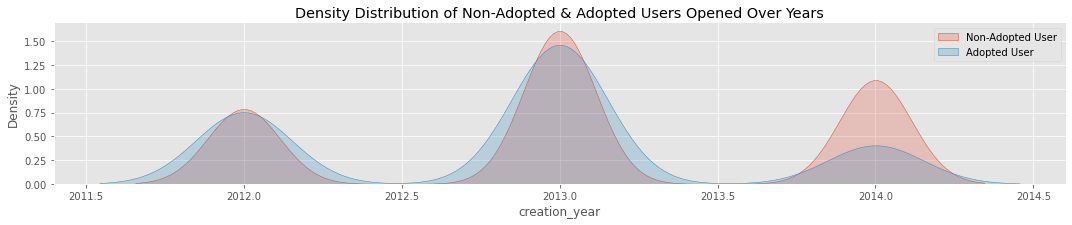

In [143]:
# Year wise Adopted user density distribution plot
sns.FacetGrid(df3, hue='user_type', aspect=5).map(sns.kdeplot, 'creation_year', shade=True)
plt.title('Density Distribution of Non-Adopted & Adopted Users Opened Over Years')
plt.legend(labels=['Non-Adopted User', 'Adopted User'])
plt.show()

In [252]:
week_performance = adopted_user_df.groupby(['year_week'])['user_id'].value_counts().sum(level=0).reset_index(name='total_acc')
week_performance.head()

,year_week,total_acc
0,2012-23,1
1,2012-24,2
2,2012-25,2
3,2012-26,1
4,2012-27,8


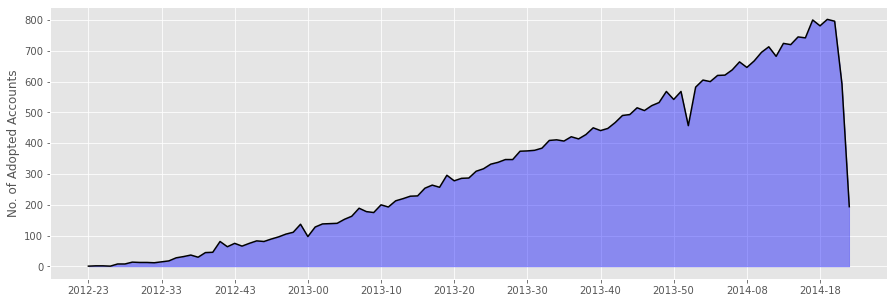

In [251]:
plt.figure(figsize=(15, 5))
plt.fill_between(week_performance.year_week, 
                 week_performance.total_acc, color='blue', alpha=0.4)
plt.plot(week_performance.year_week, week_performance.total_acc, color='black', alpha=1)
plt.xticks(np.arange(0, 105, step=10))
plt.ylabel('No. of Adopted Accounts')
plt.show()

### Observation
------------------
1. Out of 12K Users, 8823 (73.52%) are active users. Most of the active users were invited by organizations (36.13%).
2. Out of 8823 active users, 1444 (16.37%) are adopted users who visit the product atleast 3 times per week. This adopted users constitute 12.03% of total users.
3. Most of the adopted users (28%) visit frequency is 3 times.
4. Most of the adopted users were invited from organizations (34%).
5. Most (13.62%) of adopted users visit the product in the evening.
6. Most of the adopted users do not opt for mailing list as well as marketing drip. Most of the adopted users were invited during year 2013.
7. No. of Adopted Users are decreasing after 18th week of 2014.

# ML Models

In [144]:
df3.columns

Index(['object_id', 'creation_time', 'creation_year', 'creation_month', 'name',
       'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'user_type'],
      dtype='object')

<AxesSubplot:>

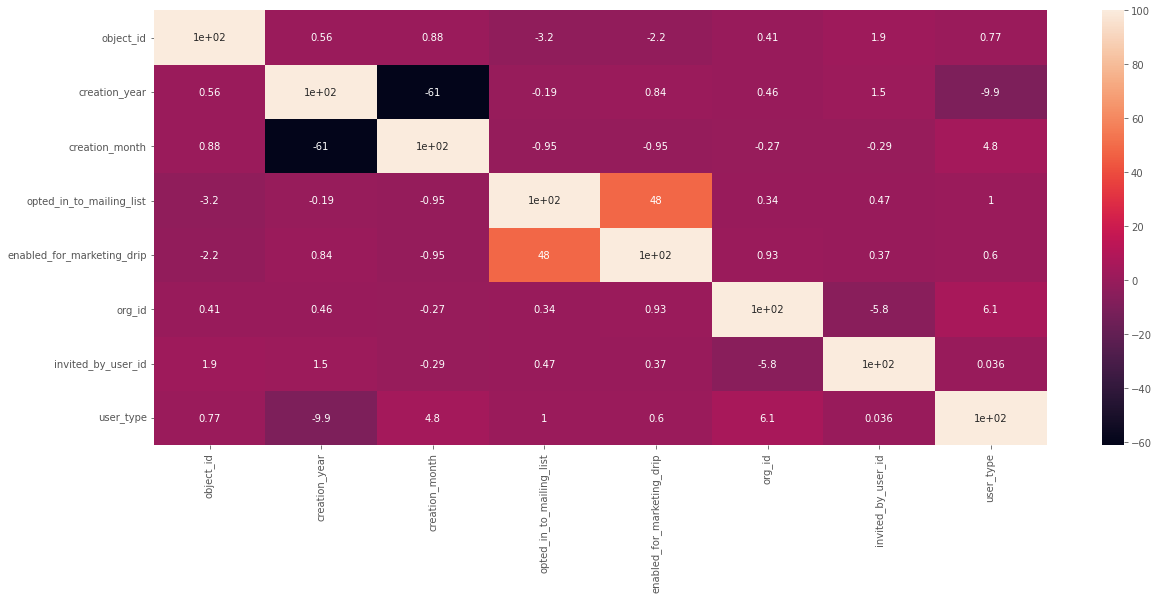

In [145]:
plt.figure(figsize=(20, 8))
sns.heatmap(df3.corr()*100, annot=True)